# Intro to Object Detection Colab

Welcome to the object detection colab!  This demo will take you through the steps of running an "out-of-the-box" detection model on a collection of images.

## Setup

In [1]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

## Import and start

In [1]:
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf



%matplotlib inline

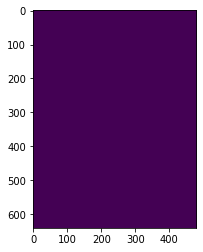

In [2]:
foo = np.zeros((640,480))
plt.imshow(foo)

## Utilities

In [3]:
from bricks.CenterNet import CenterNet
from bricks.XCeptionImageNet import XCeptionImageNet
import os
# @title Choose the model to use, then evaluate the cell.
MODELS = {
    'centernet_with_keypoints': 'center_net_hg104_512x512_kpts_coco17_tpu-32', 
    'centernet_without_keypoints': 'center_net_hg104_512x512_coco17_tpu-8', 
    'xception_imagenet': 'xception_imagenet'
}

model_display_name = 'centernet_with_keypoints' # @param ['centernet_with_keypoints', 'centernet_without_keypoints', 'xception_imagenet']
model_name = MODELS[model_display_name]

# Download the checkpoint and put it into models/research/object_detection/test_data/

if model_display_name == 'centernet_with_keypoints':
    if(not os.path.exists("centernet_hg104_512x512_kpts_coco17_tpu-32")):
        !wget http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_512x512_kpts_coco17_tpu-32.tar.gz
        !tar -xf centernet_hg104_512x512_kpts_coco17_tpu-32.tar.gz
        !mv centernet_hg104_512x512_kpts_coco17_tpu-32/checkpoint models/research/object_detection/test_data/
    model_instance = CenterNet(
        pipeline_config = 'models/research/object_detection/configs/tf2/center_net_hourglass104_512x512_coco17_tpu-8.config', 
        model_dir = 'models/research/object_detection/test_data/checkpoint/'
    )
if model_display_name == 'centernet_without_keypoints':
    if(not os.path.exists("centernet_hg104_512x512_kpts_coco17_tpu-32")):
        !wget http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_512x512_coco17_tpu-8.tar.gz
        !tar -xf centernet_hg104_512x512_coco17_tpu-8.tar.gz
        !mv centernet_hg104_512x512_coco17_tpu-8/checkpoint models/research/object_detection/test_data/
    model_instance = CenterNet(
        pipeline_config = '../models/research/object_detection/configs/tf2/center_net_hourglass104_512x512_coco17_tpu-8.config', 
        model_dir = '../models/research/object_detection/test_data/checkpoint/'
    )
if model_display_name == 'xception_imagenet':
    model_instance = XCeptionImageNet()

In [4]:
#image_path = '../data/imagecrop/fantastic-four-movie-wallpaper-ultra-hd-4k-70140.jpg'
#image_path = '../data/imagecrop/wallpapertip_4k-movie-wallpaper_2513441.jpg'
image_path = '/mnt/c/Users/alessandro.colombo/Pictures/fanart.tv/backgrounds/a-bittersweet-life___a-bittersweet-life-504a3db1a12e6.jpg'
#image_np = load_image_into_numpy_array(image_path)

In [5]:
detections = model_instance.get_detections(image_path)

Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Use `tf.cast` instead.


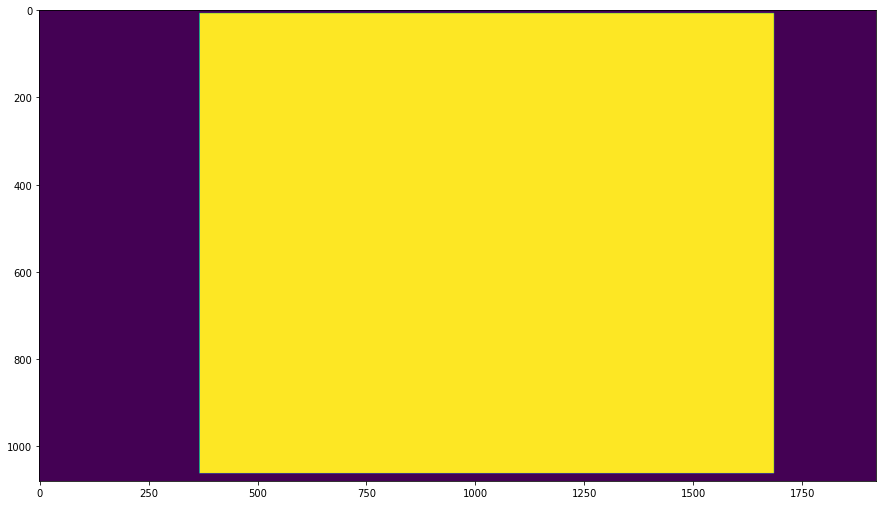

In [6]:
plt.figure(figsize=(15,20))
plt.imshow(detections)

### Superimpose detection to image

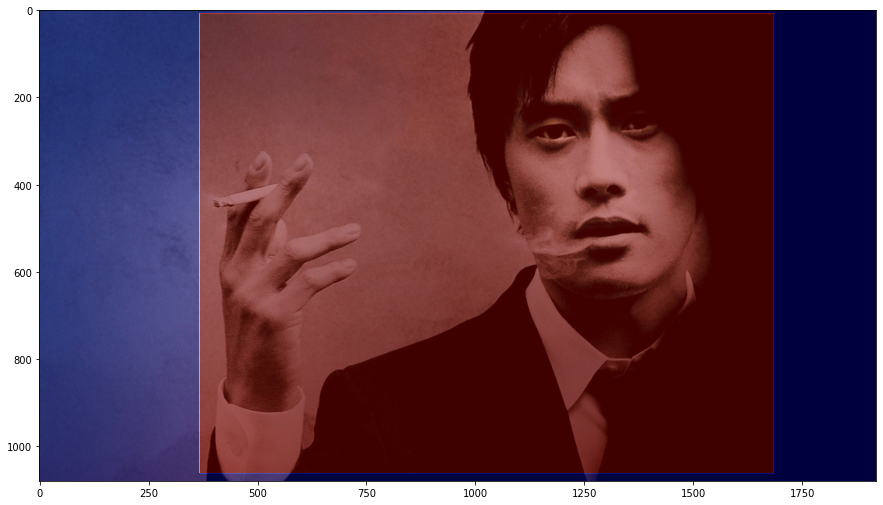

In [7]:
from tensorflow import keras
import matplotlib.cm as cm

#detection_plus = np.expand_dims(detections, axis=-1)


img = keras.preprocessing.image.load_img(image_path)
# img = keras.preprocessing.image.img_to_array(img)
#superimposed_img = detections * 4 + img
#superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

plt.figure(figsize=(15,20))
plt.imshow(img)
plt.imshow(detections, cmap='jet', alpha=0.5)

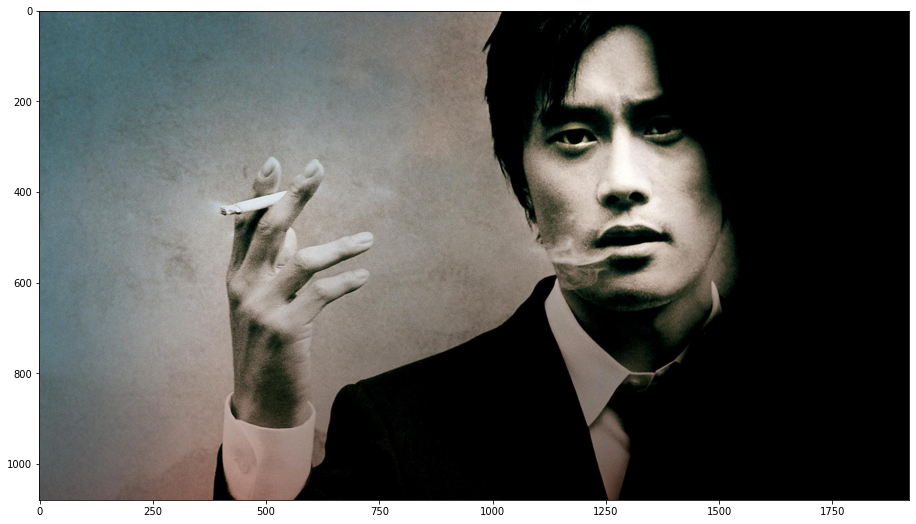

In [8]:
orig_im = Image.open(image_path)
plt.figure(figsize=(16,9))
plt.imshow(orig_im)

BEST: (378.0, 13.5, 954.0, 1036.5)


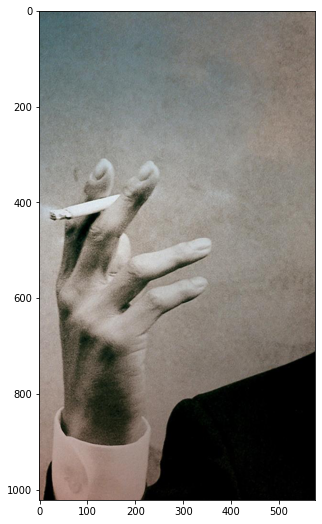

In [9]:
from utilities import *

crops = make_crop_coordinates_nhz(detections,"9_16")

best_score = -1
best_crop = []

for crop in crops:
    #TODO: add rule of thirds, avoid partial classes crop,etc.. to the score
    candidate_score = np.sum(detections[int(crop[1]):int(crop[3]),int(crop[0]):int(crop[2])])
    #print(crop)
    #print(candidate_score)
    if best_score < candidate_score:
        best_crop = crop
        best_score = candidate_score
        
print("BEST:",best_crop)
if best_crop:
    plt.figure(figsize=(16,9))
    #plt.imshow(np_im[int(best_crop[1]):int(best_crop[3]),int(best_crop[0]):int(best_crop[2])])
    plt.imshow(orig_im.crop(best_crop))
else:
    print("No candidates")